In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing training dataset
df = pd.read_csv('aggregate_covid_country.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
# from dates we can get monthly, daily, yearly deaths which can help in data analysis
df_dates = pd.DataFrame()
df_dates['Month']=df['Date'].dt.month_name()
df_dates['Year']=df['Date'].dt.year
df_dates['Day']=df['Date'].dt.day_name()
df_dates['Date']=df['Date'].dt.day
df_dates['Deaths']=df['Deaths']
df_dates

,Month,Year,Day,Date,Deaths
0,January,2020,Wednesday,22,0
1,January,2020,Wednesday,22,0
2,January,2020,Wednesday,22,0
3,January,2020,Wednesday,22,0
4,January,2020,Wednesday,22,0
...,...,...,...,...,...
23683,May,2020,Tuesday,26,3
23684,May,2020,Tuesday,26,1
23685,May,2020,Tuesday,26,49
23686,May,2020,Tuesday,26,7


In [6]:
# checking the total number of distinct year
df_dates['Year'].drop_duplicates()

0    2020
Name: Year, dtype: int64

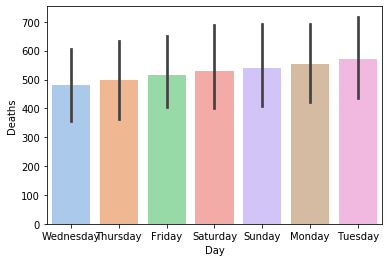

In [7]:
# average deaths during days of week
sns.set_palette('pastel')
sns.barplot(x='Day',y='Deaths',data=df_dates)
plt.show()
# we can see that most deaths are on tuesday and least are on wednesday

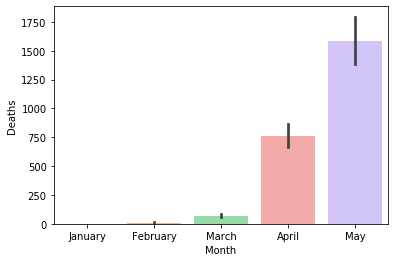

In [8]:
# average deaths during months of the year
sns.barplot(x='Month',y='Deaths',data=df_dates)
plt.show()
# plot shows average deaths are most in the month of May
# average deaths in the month on January and February are almost zero
# average deaths have a drastic increase from the month on March

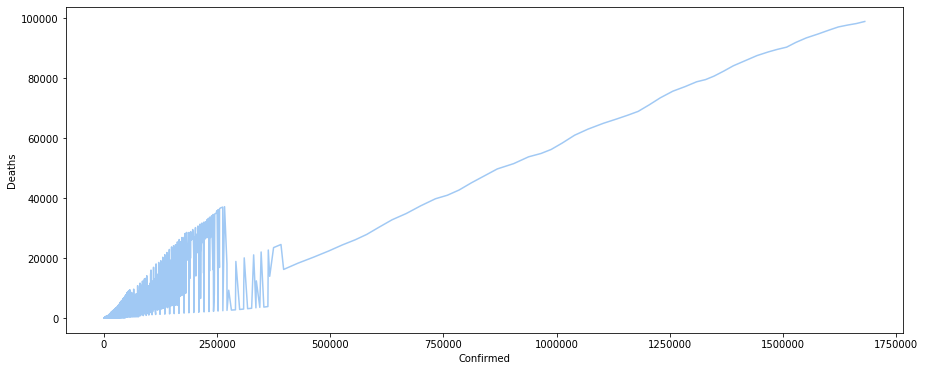

In [9]:
# check how deaths vary with the number of confirmed cases
plt.figure(figsize=(15,6))
sns.lineplot(x='Confirmed',y='Deaths',data=df)
plt.show()
# deaths increase with the number of confirmed cases
# deaths fluctuate for low number of confirmed cases

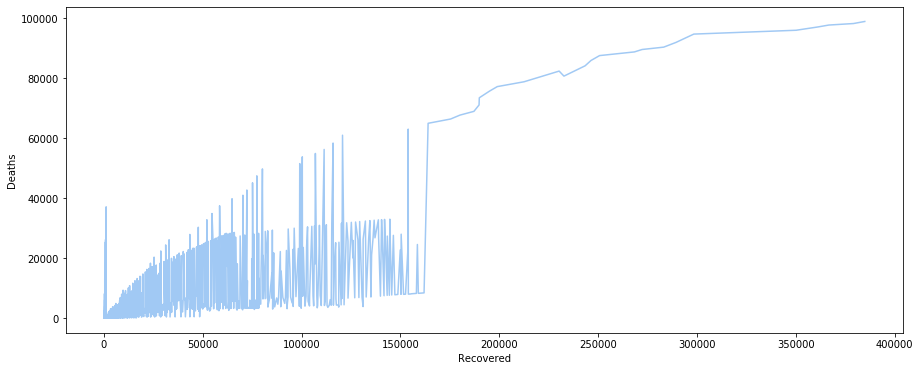

In [10]:
# check how deaths vary with the number of recovered cases
plt.figure(figsize=(15,6))
sns.lineplot(x='Recovered',y='Deaths',data=df)
plt.show()
# deaths fluctuate for number of recovered upto 170000
# after 170000 recovered deaths increase with the number of recovered

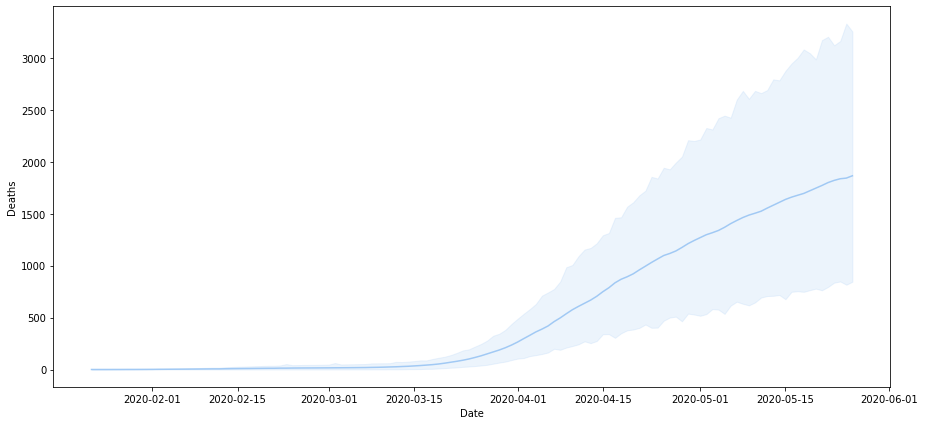

In [11]:
# check how deaths vary with date
plt.figure(figsize=(15,7))
sns.lineplot(x='Date',y='Deaths',data=df)
plt.show()
# number of deaths gradually increase at first
# after 2020-03-15 number of deaths increase drastically

In [12]:
df_dates = df_dates.drop(columns=['Year','Day','Deaths'])

In [13]:
df_dates = pd.get_dummies(df_dates,drop_first=True)
df_dates

,Date,Month_February,Month_January,Month_March,Month_May
0,22,0,1,0,0
1,22,0,1,0,0
2,22,0,1,0,0
3,22,0,1,0,0
4,22,0,1,0,0
...,...,...,...,...,...
23683,26,0,0,0,1
23684,26,0,0,0,1
23685,26,0,0,0,1
23686,26,0,0,0,1


In [14]:
df = df.drop(columns=['Date'])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [16]:
df = pd.concat([df_dates,df],axis=1)
df

,Date,Month_February,Month_January,Month_March,Month_May,Country,Confirmed,Recovered,Deaths
0,22,0,1,0,0,0,0,0,0
1,22,0,1,0,0,1,0,0,0
2,22,0,1,0,0,2,0,0,0
3,22,0,1,0,0,3,0,0,0
4,22,0,1,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...
23683,26,0,0,0,1,183,429,365,3
23684,26,0,0,0,1,184,9,6,1
23685,26,0,0,0,1,185,249,10,49
23686,26,0,0,0,1,186,920,336,7


In [17]:
df.skew()

Date              -0.068932
Month_February     1.282188
Month_January      3.112464
Month_March        1.179410
Month_May          1.451351
Country            0.000000
Confirmed         18.674502
Recovered         10.662286
Deaths            14.218167
dtype: float64

In [18]:
df['Confirmed']=np.log(df['Confirmed']+1)
df['Recovered']=np.log(df['Recovered']+1)
df['Deaths']=np.log(df['Deaths']+1)

In [19]:
# seprating into input and output variables
y=pd.DataFrame(df['Deaths'])
x = df.drop(columns=['Deaths'])

In [20]:
x

,Date,Month_February,Month_January,Month_March,Month_May,Country,Confirmed,Recovered
0,22,0,1,0,0,0,0.000000,0.000000
1,22,0,1,0,0,1,0.000000,0.000000
2,22,0,1,0,0,2,0.000000,0.000000
3,22,0,1,0,0,3,0.000000,0.000000
4,22,0,1,0,0,4,0.000000,0.000000
...,...,...,...,...,...,...,...,...
23683,26,0,0,0,1,183,6.063785,5.902633
23684,26,0,0,0,1,184,2.302585,1.945910
23685,26,0,0,0,1,185,5.521461,2.397895
23686,26,0,0,0,1,186,6.825460,5.820083


In [21]:
y = pd.DataFrame(y)
y

,Deaths
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
23683,1.386294
23684,0.693147
23685,3.912023
23686,2.079442


In [22]:
Model_r2 = pd.DataFrame(columns = ['Model','r2 score without cross validation'])
Model_crossval = pd.DataFrame(columns = ['Model','Cross validation score'])

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [24]:
# here we will find the random state value with which our linear model learns maximum
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state ',r_state, ' is : ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state = r_state
print('\n\n')
print('Max r2_score corresponding to state ',final_r_state, ' is : ',max_r_score)

r2_score corresponding to random state  42  is :  0.8440916435240021
r2_score corresponding to random state  43  is :  0.8472202531876227
r2_score corresponding to random state  44  is :  0.8473190513291606
r2_score corresponding to random state  45  is :  0.8409831370506647
r2_score corresponding to random state  46  is :  0.8428862106886441
r2_score corresponding to random state  47  is :  0.8502759346763846
r2_score corresponding to random state  48  is :  0.8518950917125814
r2_score corresponding to random state  49  is :  0.8493018877606264
r2_score corresponding to random state  50  is :  0.8514500288879971
r2_score corresponding to random state  51  is :  0.8506205039823366
r2_score corresponding to random state  52  is :  0.8391219506966965
r2_score corresponding to random state  53  is :  0.8492754668157239
r2_score corresponding to random state  54  is :  0.8522293860223854
r2_score corresponding to random state  55  is :  0.8474036115540196
r2_score corresponding to random s

In [25]:
# Linear Regression model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=93,test_size = 0.20)
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
score = r2_score(y_test,y_pred)
Model_r2 = Model_r2.append({'Model':'Linear Regression','r2 score without cross validation':score},ignore_index=True)

# Cross Validation
cross_score=cross_val_score(LinearRegression(),x,y,cv=20,scoring='r2')
cross_score.mean()
Model_crossval = Model_crossval.append({'Model':'Linear Regression','Cross validation score':cross_score.mean()},ignore_index=True)

In [26]:
# GridSearchCV for Lasso regression model
model_l = Lasso()
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001]}
gd_l = GridSearchCV(estimator=model_l,param_grid=alphavalue,scoring='r2',cv=10)
gd_l.fit(x_train,y_train)
best_parameters = gd_l.best_params_
print(best_parameters)
best_result = gd_l.best_score_
print(best_result)

{'alpha': 0.0001}
0.8460636661697268


In [27]:
# Lasso Regression model
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
score = r2_score(y_test,y_pred)
Model_r2 = Model_r2.append({'Model':'Lasso Regression','r2 score without cross validation':score},ignore_index=True)

# Cross Validation
cross_score=cross_val_score(Lasso(alpha=0.0001),x,y,cv=5,scoring='r2')
cross_score.mean()
Model_crossval = Model_crossval.append({'Model':'Lasso Regression','Cross validation score':cross_score.mean()},ignore_index=True)

In [28]:
# GridSearchCV for Ridge regression model
model_r = Ridge()
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001]}
gd_r = GridSearchCV(estimator=model_l,param_grid=alphavalue,scoring='r2',cv=10)
gd_r.fit(x_train,y_train)
best_parameters = gd_r.best_params_
print(best_parameters)
best_result = gd_r.best_score_
print(best_result)

{'alpha': 0.0001}
0.8460636661697268


In [29]:
# Ridge Regression model
lr = Ridge(alpha=0.0001)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score = r2_score(y_test,y_pred)
Model_r2 = Model_r2.append({'Model':'Ridge Regression','r2 score without cross validation':score},ignore_index=True)

# Cross Validation
cross_score=cross_val_score(Ridge(alpha=0.0001),x,y,cv=5,scoring='r2')
cross_score.mean()
Model_crossval = Model_crossval.append({'Model':'Ridge Regression','Cross validation score':cross_score.mean()},ignore_index=True)

In [30]:
# Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100,random_state=96)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = r2_score(y_test,y_pred)
Model_r2 = Model_r2.append({'Model':'Random Forest Regressor','r2 score without cross validation':score},ignore_index=True)

# Cross Validation
cross_score=cross_val_score(RandomForestRegressor(n_estimators=100,random_state=40),x,y,cv=5,scoring='r2')
cross_score.mean()
Model_crossval = Model_crossval.append({'Model':'Random Forest Regressor','Cross validation score':cross_score.mean()},ignore_index=True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-

In [31]:
# GridSearchCV for Decision Tree Regressor
dtr = DecisionTreeRegressor()
grid_param = { 'criterion' : ['mse', 'friedman_mse', 'mae']}
gd_dtr = GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='r2',cv=5)
gd_dtr.fit(x_train,y_train)
best_parameters = gd_dtr.best_params_
print(best_parameters)
best_result = gd_dtr.best_score_
print(best_result)

{'criterion': 'mse'}
0.9779893764261951


In [32]:
# Decision Tree Regressor model
dt = DecisionTreeRegressor(criterion='mse')
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = r2_score(y_test,y_pred)
Model_r2 = Model_r2.append({'Model':'Decision Tree Regressor','r2 score without cross validation':score},ignore_index=True)

# Cross Validation
cross_score=cross_val_score(RandomForestRegressor(criterion='mse'),x,y,cv=5,scoring='r2')
cross_score.mean()
Model_crossval = Model_crossval.append({'Model':'Decision Tree Regressor','Cross validation score':cross_score.mean()},ignore_index=True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-

In [33]:
Model_r2.sort_values(by='r2 score without cross validation',ascending=False,ignore_index=True)

,Model,r2 score without cross validation
0,Linear Regression,0.858795
1,Ridge Regression,0.858795
2,Random Forest Regressor,0.858795
3,Decision Tree Regressor,0.858795
4,Lasso Regression,0.858782


In [34]:
Model_crossval.sort_values(by='Cross validation score',ascending=False,ignore_index=True)

,Model,Cross validation score
0,Decision Tree Regressor,0.896898
1,Random Forest Regressor,0.896868
2,Linear Regression,0.571467
3,Lasso Regression,-0.315374
4,Ridge Regression,-0.317438


In [35]:
from sklearn.externals import joblib
joblib.dump(dt,'Covid_19.pkl')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Covid_19.pkl']